# Introduction

*Lab 2*

The purpose of this laboratory exercise is to become acquainted with signature data acquisition and
statistical analysis

In [2]:
# imports
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd

# Exercise 1

In [3]:
# Real Mean and Standard deviation
mu = 50
std = 5
# Number of samples
qtt_samples = 80
qtt_samples2 = 1000

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm2 = norm.rvs(mu, std, size=qtt_samples2)

REAL mean: 50.80; std: 5.22


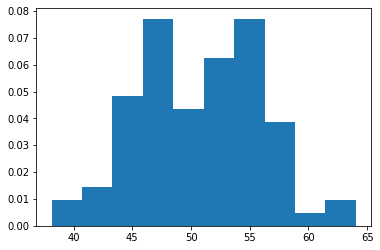

In [4]:
# SET 1

# Plotting histogram with 10 bins
plt.hist(pop_norm, bins=10, density=True)
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

REAL mean: 49.77; std: 5.00


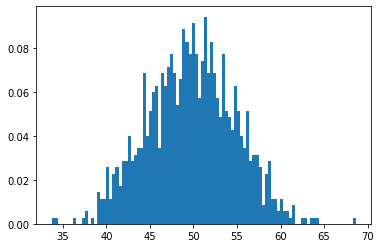

In [5]:
# SET 2

#  Plotting histogram with 100 bins
plt.hist(pop_norm2, bins=100, density=True)
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm2), np.std(pop_norm2)))

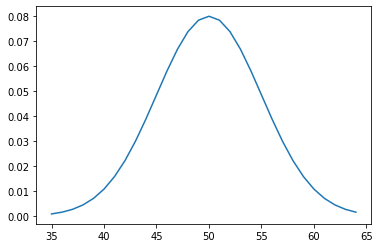

In [6]:
# matching the scale of above chart
x = np.arange(35, 65)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

*`Comparison`*

It is evident from the both sets that the histogram tends to appear more like theortical curve with higher number of samples

***
Real Mean of SET 1 (with 80 samples) - 50.80

Real Mean of SET 2 (with 1000 samples) - 49.77
***
Std. of SET 1 (with 80 samples) - 5.22

Std. of SET 2 (with 1000 samples) - 5.00
***

The above data directly compares the real mean and standard deviation of two sets. We can see that the real mean of set 2 is closer to 50.00 compared to set 1. Moreove, the standard deviation of set 2 is also more accurate than set 1, at 5.00.

We have combined both sets together below.

Text(0.5, 1.0, 'Histograms')

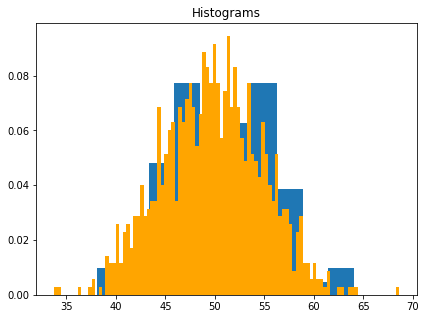

In [7]:
# Comparing two histograms together
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(pop_norm, bins=10, density=True);
plt.hist(pop_norm2, bins=100, density=True, color='orange')
plt.title('Histograms')

# Exercise 2

In [290]:
# Reading the data
genui_dir = 'genuine/'
impos_dir = 'impostor/'

dir_path = './signature_samples/calgary/'

gen_data = pd.read_csv(dir_path + genui_dir + '1.csv')
impos_data = pd.read_csv(dir_path + impos_dir + '1.csv')

# splitting the original data into 3 variables
coord_g = gen_data[['X', 'Y']].to_numpy()
time_g = gen_data['Time'].to_numpy().reshape((-1,1))
prs_g = gen_data['Pressure'].to_numpy().reshape((-1,1))

coord_i = impos_data[['X', 'Y']].to_numpy()
time_i = impos_data['Time'].to_numpy().reshape((-1,1))
prs_i = impos_data['Pressure'].to_numpy().reshape((-1,1))

In [291]:
# to correctly map the pressure into the colormap the normalization is required 
prs_g = prs_g / np.max(prs_g) * 255
prs_g = prs_g.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs_g)+1)


prs_i = prs_i / np.max(prs_i) * 255
prs_i = prs_i.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs_i)+1)

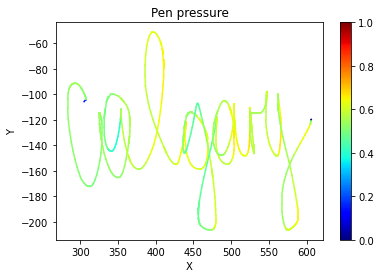

In [292]:
# plotting genuine signature

for i in range(len(prs_g)-1):
    c = pressuremap(prs_g[i]).squeeze()
    
    time_diff = abs(time_g[i+1] - time_g[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshold
        im = plt.plot(coord_g[i:i+2,0], -coord_g[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

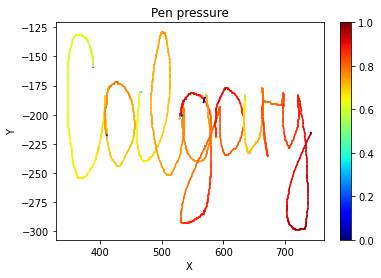

In [293]:
# plotting impostor signature

for i in range(len(prs_i)-1):
    c = pressuremap(prs_i[i]).squeeze()
    
    time_diff = abs(time_i[i+1] - time_i[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshold
        im = plt.plot(coord_i[i:i+2,0], -coord_i[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

`Mean and Std of Pressure of the signatures`

In [294]:
# for genuine signature
mean_g = np.mean(prs_g)
std_g = np.std(prs_g)

print('mean: %.2f; std: %.2f' % (mean_g, std_g))

mean: 142.45; std: 21.65


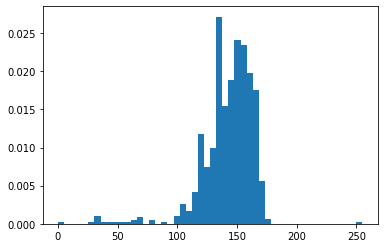

In [295]:
plt.hist(prs_g, bins=50, density=True);

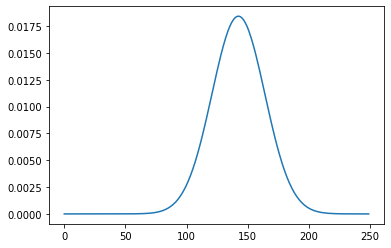

In [296]:
x1 = np.arange(0, 250)

x_pdf1 = norm.pdf(x1, loc=mean_g, scale=std_g)
plt.plot(x1, x_pdf1);

In [297]:
# for impostor signature
mean_i = np.mean(prs_i)
std_i = np.std(prs_i)

print('mean: %.2f; std: %.2f' % (mean_i, std_i))

mean: 189.10; std: 39.39


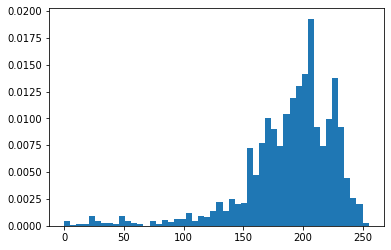

In [298]:
plt.hist(prs_i, bins=50, density=True);

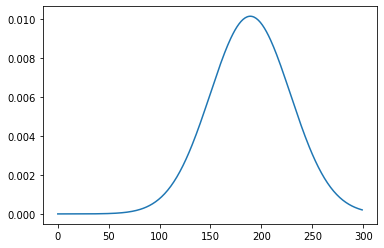

In [299]:
x2 = np.arange(0, 300)

x_pdf2 = norm.pdf(x2, loc=mean_i, scale=std_i)
plt.plot(x2, x_pdf2);

# Exercise 3

We have the line $$time\_diff==0$$ in order to avoid getting an undefined value when dividing it in the formula of velocity, which is; $$vel[i] = \frac{distance}{time\_diff} $$ 

When time_diff is 0, it will result in division by 0. Therefore, in order to prevent this case, instead of time_diff being equal to zero, we give it a value of 0.001 which is very close to zero, to solve that case.

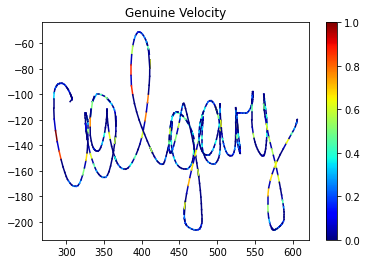

In [300]:
# plotting velocity of Genuine Velocity

vel = np.zeros((len(time_g)-1, 1))

for i in range(len(time_g)-1):
    distance = np.sqrt((coord_g[i+1,0] - coord_g[i,0])**2 + 
                       (coord_g[i+1,1] - coord_g[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time_g[i+1] - time_g[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time_g[i+1] - time_g[i])
        
    if time_diff < 17: # You may need to change this threshold
        plt.plot(coord_g[i:i+2,0], -coord_g[i:i+2,1], c=c)
plt.title('Genuine Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

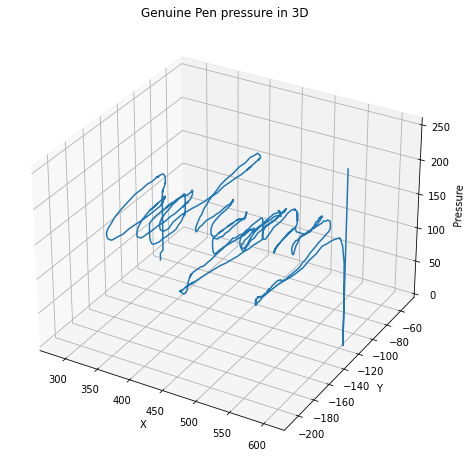

In [301]:
# 3d plot
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord_g[:,0].flatten(), -coord_g[:,1].flatten(), prs_g.flatten())

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Genuine Pen pressure in 3D');

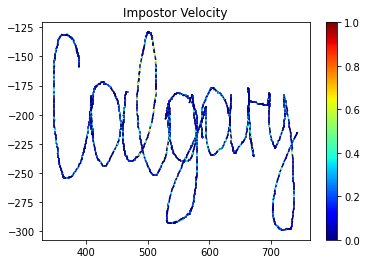

In [302]:
# plotting velocity of Imposter Velocity

vel = np.zeros((len(time_i)-1, 1))

for i in range(len(time_i)-1):
    distance = np.sqrt((coord_i[i+1,0] - coord_i[i,0])**2 + 
                       (coord_i[i+1,1] - coord_i[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time_i[i+1] - time_i[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time_i[i+1] - time_i[i])
        
    if time_diff < 17: # You may need to change this threshold
        plt.plot(coord_i[i:i+2,0], -coord_i[i:i+2,1], c=c)
plt.title('Impostor Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

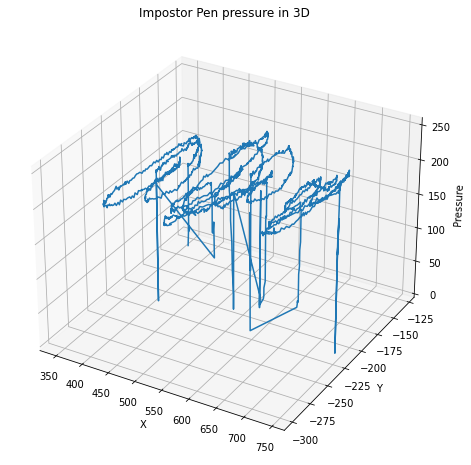

In [303]:
# 3D plot
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord_i[:,0].flatten(), -coord_i[:,1].flatten(), prs_i.flatten())

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Impostor Pen pressure in 3D');

# Exercise 4

In [304]:
# Function to return velocity from time and coords
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [305]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    # opening genuine signatures
    csv_file = pd.read_csv(dir_path + genui_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)

In [306]:
# calculating mean and sigma of 30 signatures for their velocity and pressure

mu_vel = np.mean(stats_measures[:, 0])
std_vel = np.std(stats_measures[:, 0])

mu_prs = np.mean(stats_measures[:, 2])
std_prs = np.std(stats_measures[:, 2])

n_prs = norm(mu_prs, std_prs)
n_vel = norm(mu_vel, std_vel)


Text(0.5, 1.0, 'Normal Distributions of avg Pressure')

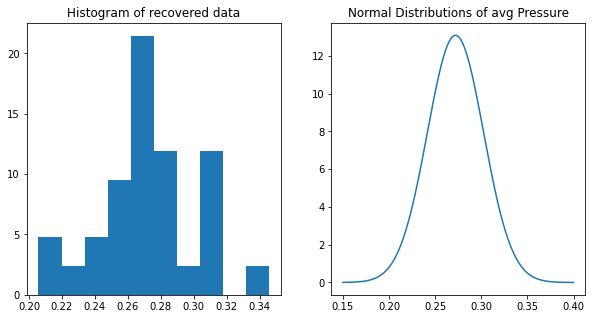

In [326]:
# Pressure

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(stats_measures[:, 2], density=True)
plt.title('Histogram of recovered data');

plt.subplot(1, 2, 2)
x = np.arange(0.15, 0.40, 0.0001)
plt.plot(x, n_prs.pdf(x))
plt.title('Normal Distributions of avg Pressure')

Text(0.5, 1.0, 'Normal Distributions of avg Velocity')

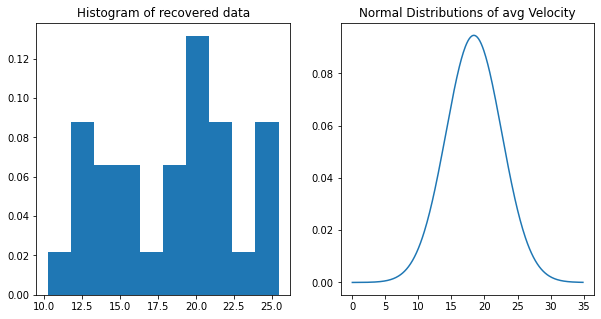

In [330]:
# Velocity

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(stats_measures[:, 0], density=True)
plt.title('Histogram of recovered data');

plt.subplot(1, 2, 2)
x = np.arange(0, 35, 0.1)
plt.plot(x, n_vel.pdf(x))
plt.title('Normal Distributions of avg Velocity')

# Exercise 5

In [313]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures_impostor = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    # imposter signatures
    csv_file1 = pd.read_csv(dir_path + impos_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file1[['X', 'Y']].to_numpy()
    time1 = csv_file1['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file1['Pressure'].to_numpy().reshape((-1,1))
    vel1 = calc_velocity(time1, coord1)
    
    stats_measures_impostor[i, 0] = np.mean(vel1)
    stats_measures_impostor[i, 1] = np.std(vel1)
    
    stats_measures_impostor[i, 2] = np.mean(prs1)
    stats_measures_impostor[i, 3] = np.std(prs1)

In [314]:
# calculating mean and sigma of 30 signatures for their velocity and pressure

mu_vel1 = np.mean(stats_measures_impostor[:, 0])
std_vel1 = np.std(stats_measures_impostor[:, 0])

mu_prs1 = np.mean(stats_measures_impostor[:, 2])
std_prs1 = np.std(stats_measures_impostor[:, 2])

n_prs1 = norm(mu_prs1, std_prs1)
n_vel1 = norm(mu_vel1, std_vel1)

Text(0.5, 1.0, 'Normal Distributions of avg Pressure')

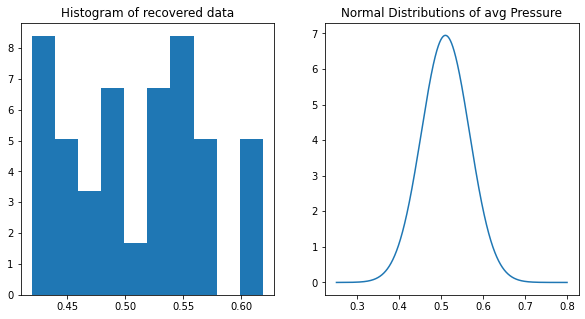

In [332]:
# Pressure

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(stats_measures_impostor[:, 2], density=True)
plt.title('Histogram of recovered data');

plt.subplot(1, 2, 2)
x = np.arange(0.25, 0.8, 0.0001)
plt.plot(x, n_prs1.pdf(x))
plt.title('Normal Distributions of avg Pressure')

Text(0.5, 1.0, 'Normal Distributions of avg Velocity')

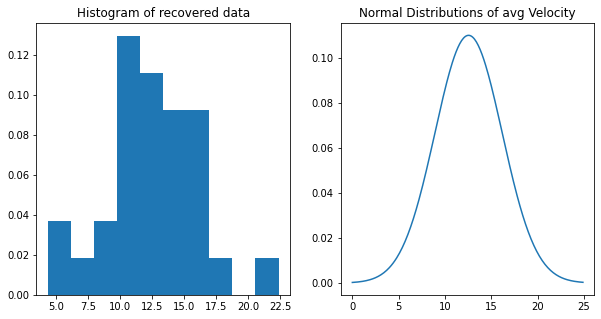

In [335]:
# Velocity

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(stats_measures_impostor[:, 0], density=True)
plt.title('Histogram of recovered data');

plt.subplot(1, 2, 2)
x = np.arange(0, 25, 0.1)
plt.plot(x, n_vel1.pdf(x))
plt.title('Normal Distributions of avg Velocity')

*`Comparison`*


On comparison of normal distributions of the average pressure applied by  the genuine and impostor person we can see that there is a hug difference between the pressure applied . Also the curves are fairly well separated and there is quite some difference between the peaks of the curves. So we can conclude easily that both the persons are completely different.

On comparison of normal distributions of the average velocity of writing of the genuine and impostor person we can see that there is a good amount of similarity between the two curves  and even the peaks of the curves are a bit close. So in conclusion there is some but not a great amount of distinction between the two curves. Therefore it is difficult to conclude if the two persons are same or not.


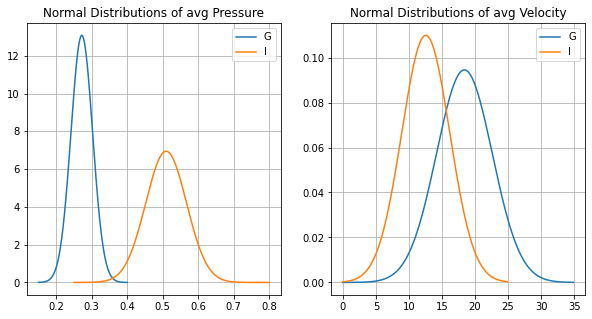

In [350]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
x = np.arange(0.15, 0.40, 0.0001)
plt.plot(x, n_prs.pdf(x))

x = np.arange(0.25, 0.8, 0.0001)
plt.plot(x, n_prs1.pdf(x))
plt.title('Normal Distributions of avg Pressure')
plt.grid()
plt.legend('GI')

plt.subplot(1, 2, 2)
x = np.arange(0, 35, 0.1)
plt.plot(x, n_vel.pdf(x))

x = np.arange(0, 25, 0.1)
plt.plot(x, n_vel1.pdf(x))
plt.title('Normal Distributions of avg Velocity')
plt.grid()
plt.legend('GI');

# Conclusion

To conclude, Signature biometrics can be useful to identify any person by comparing and analysing the pressure and velocity of the signatures. An imposter can copy the structure of the signature, but trying to forge velocity of the strokes of the signature as well as pressure applied at certain points are unique to each person and therefore, by anaylsing this information, the identify of any individual can be verified from signature biometrics.


`References`

D2L Ucalgary; ENCM 509 - Lab 2_2022W
https://d2l.ucalgary.ca/d2l/le/content/425591/viewContent/5088257/View